# Project 2: Binary Classification on ‘Customer_Churn’ using Keras

## Problem Statement:

You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from
churning out to other telecom companies.

## Domain:
Telecom

## Domain Context:
Customer churn, in simple terms means that the customer has stopped doing business with the company and this is a common problem when it comes to telecom industries. To avoid this, companies use predictive analysis to gauge the factors responsible for a customer to leave the company. These churn prediction models help in finding out the customer base that are most likely to churn out.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
customer = pd.read_csv('customer_churn.csv')
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
customer.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [4]:
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
customer['TotalCharges'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
customer['TotalCharges'] = customer['TotalCharges'].astype(float)
customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
customer.dropna(inplace=True)
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [9]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### A) Data Manipulation:

In [10]:
#a. Find the total number of male customers
sum(customer['gender']=="Male")

3549

In [11]:
#b. Find the total number of customers whose Internet Service is ‘DSL’
sum(customer['InternetService']=="DSL")

2416

In [12]:
#c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
new_customer = customer[(customer['gender']=='Female') & (customer['SeniorCitizen']==1) & (customer['PaymentMethod']=='Mailed check')]
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,No
694,2682-KEVRP,Female,1,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.05,417.00,No
747,3966-HRMZA,Female,1,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.90,No
947,9904-EHEVJ,Female,1,Yes,Yes,32,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,91.35,2896.55,No
1029,4184-TJFAN,Female,1,Yes,Yes,3,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.30,273.75,Yes
1112,2176-LVPNX,Female,1,No,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.85,6293.45,No


In [13]:
#d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’
new_customer1 = customer[(customer['tenure']<10) | (customer['TotalCharges']<500)]
new_customer1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### B) Data Visualization:

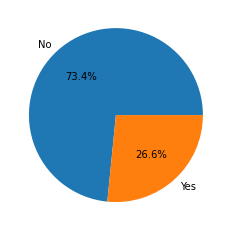

In [14]:
#a. Build a pie-chart to show the distribution of customers would be churning out
plt.pie(customer['Churn'].value_counts().tolist(),labels=customer['Churn'].value_counts().keys().tolist(),autopct="%0.1f%%")
plt.show()

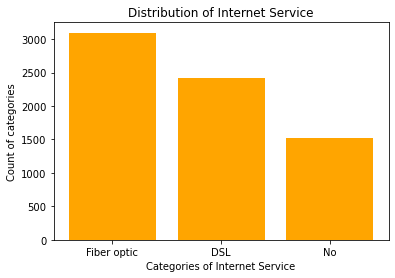

In [15]:
#b. Build a bar-plot to show the distribution of ‘Internet Service’
plt.bar(customer['InternetService'].value_counts().keys().tolist(),customer['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()

### C) Model Building:

In [16]:
customer['Churn']=LabelEncoder().fit_transform(customer['Churn'])

In [17]:
X=customer[['tenure']]
Y=customer[['Churn']]
rs=3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=rs)

In [18]:
model=Sequential()
model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, Y_train, epochs=150, validation_data=(X_test,Y_test))

Epoch 1/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5235 - accuracy: 0.7473 - val_loss: 0.4924 - val_accuracy: 0.7645
Epoch 2/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.7499 - val_loss: 0.4987 - val_accuracy: 0.7645
Epoch 3/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7489 - val_loss: 0.4936 - val_accuracy: 0.7645
Epoch 4/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7473 - val_loss: 0.4965 - val_accuracy: 0.7645
Epoch 5/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5218 - accuracy: 0.7483 - val_loss: 0.5265 - val_accuracy: 0.7654
Epoch 6/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7479 - val_loss: 0.4953 - val_accuracy: 0.7645
Epoch 7/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5218 - accuracy: 0.7497 - val_loss: 0.4918 - val_accuracy: 0.7645

Epoch 58/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.7527 - val_loss: 0.4922 - val_accuracy: 0.7645
Epoch 59/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7513 - val_loss: 0.4921 - val_accuracy: 0.7645
Epoch 60/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7503 - val_loss: 0.4934 - val_accuracy: 0.7645
Epoch 61/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7517 - val_loss: 0.4992 - val_accuracy: 0.7645
Epoch 62/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7497 - val_loss: 0.4956 - val_accuracy: 0.7645
Epoch 63/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7491 - val_loss: 0.5045 - val_accuracy: 0.7673
Epoch 64/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7501 - val_loss: 0.4921 - val_accuracy:

Epoch 115/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7515 - val_loss: 0.4884 - val_accuracy: 0.7673
Epoch 116/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7515 - val_loss: 0.4903 - val_accuracy: 0.7673
Epoch 117/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7515 - val_loss: 0.4918 - val_accuracy: 0.7673
Epoch 118/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7515 - val_loss: 0.4894 - val_accuracy: 0.7673
Epoch 119/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.7515 - val_loss: 0.4909 - val_accuracy: 0.7673
Epoch 120/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.7515 - val_loss: 0.4892 - val_accuracy: 0.7673
Epoch 121/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7515 - val_loss: 0.4884 - val_ac

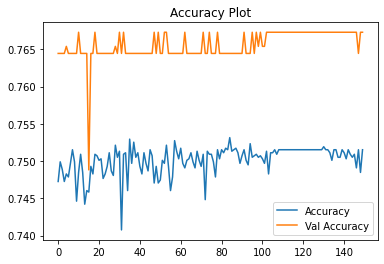

In [20]:
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

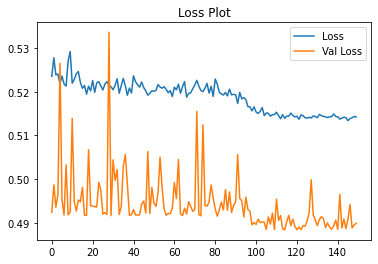

In [21]:
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()

In [22]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)

66/66 [==============================] - 0s 1ms/step


In [23]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred)*100)
print(classification_report(Y_test, Y_pred))

[[1473  107]
 [ 384  146]]
Accuracy Score: 76.7298578199052
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1580
           1       0.58      0.28      0.37       530

    accuracy                           0.77      2110
   macro avg       0.69      0.60      0.62      2110
weighted avg       0.74      0.77      0.74      2110



In [24]:
X=customer[['tenure']]
Y=customer[['Churn']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=rs)

In [25]:
model=Sequential()
model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                24        
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train, Y_train, epochs=150, validation_data=(X_test,Y_test))

Epoch 1/150
154/154 [==============================] - 1s 5ms/step - loss: 1.1458 - accuracy: 0.6339 - val_loss: 0.4984 - val_accuracy: 0.7488
Epoch 2/150
154/154 [==============================] - 1s 3ms/step - loss: 0.7183 - accuracy: 0.6845 - val_loss: 0.5206 - val_accuracy: 0.7488
Epoch 3/150
154/154 [==============================] - 0s 3ms/step - loss: 0.6144 - accuracy: 0.6965 - val_loss: 0.5059 - val_accuracy: 0.7488
Epoch 4/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7111 - val_loss: 0.5182 - val_accuracy: 0.7488
Epoch 5/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7168 - val_loss: 0.5066 - val_accuracy: 0.7488
Epoch 6/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7194 - val_loss: 0.5135 - val_accuracy: 0.7488
Epoch 7/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7229 - val_loss: 0.5084 - val_accuracy: 0.7488

Epoch 58/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7280 - val_loss: 0.5063 - val_accuracy: 0.7488
Epoch 59/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7280 - val_loss: 0.5021 - val_accuracy: 0.7488
Epoch 60/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.7280 - val_loss: 0.5066 - val_accuracy: 0.7488
Epoch 61/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.7280 - val_loss: 0.5035 - val_accuracy: 0.7488
Epoch 62/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.7280 - val_loss: 0.5124 - val_accuracy: 0.7488
Epoch 63/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7280 - val_loss: 0.5033 - val_accuracy: 0.7488
Epoch 64/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7280 - val_loss: 0.4982 - val_accuracy:

Epoch 115/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.7280 - val_loss: 0.4976 - val_accuracy: 0.7488
Epoch 116/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7280 - val_loss: 0.5078 - val_accuracy: 0.7488
Epoch 117/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.7280 - val_loss: 0.4985 - val_accuracy: 0.7488
Epoch 118/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7280 - val_loss: 0.5069 - val_accuracy: 0.7488
Epoch 119/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.7280 - val_loss: 0.5090 - val_accuracy: 0.7488
Epoch 120/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7280 - val_loss: 0.5055 - val_accuracy: 0.7488
Epoch 121/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5275 - accuracy: 0.7280 - val_loss: 0.5016 - val_ac

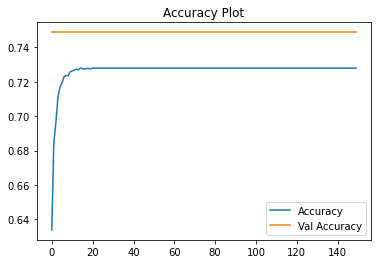

In [27]:
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

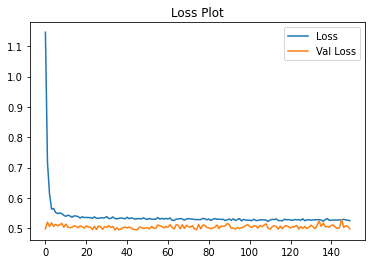

In [28]:
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()

In [29]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)

66/66 [==============================] - 0s 1ms/step


In [30]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred)*100)
print(classification_report(Y_test, Y_pred))

[[1580    0]
 [ 530    0]]
Accuracy Score: 74.88151658767772
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1580
           1       0.00      0.00      0.00       530

    accuracy                           0.75      2110
   macro avg       0.37      0.50      0.43      2110
weighted avg       0.56      0.75      0.64      2110



C:\Users\dutta\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dutta\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dutta\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
X=customer[['tenure','MonthlyCharges','TotalCharges']]
Y=customer[['Churn']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=rs)

In [32]:
model=Sequential()
model.add(Dense(12,input_dim=3,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                48        
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train, Y_train, epochs=150, validation_data=(X_test,Y_test))

Epoch 1/150
154/154 [==============================] - 1s 4ms/step - loss: 24.7455 - accuracy: 0.5057 - val_loss: 1.3093 - val_accuracy: 0.5692
Epoch 2/150
154/154 [==============================] - 0s 2ms/step - loss: 1.1472 - accuracy: 0.5327 - val_loss: 0.7238 - val_accuracy: 0.6152
Epoch 3/150
154/154 [==============================] - 0s 2ms/step - loss: 0.8356 - accuracy: 0.6617 - val_loss: 2.0522 - val_accuracy: 0.2777
Epoch 4/150
154/154 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.7349 - val_loss: 0.4825 - val_accuracy: 0.7910
Epoch 5/150
154/154 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.7383 - val_loss: 0.4689 - val_accuracy: 0.7915
Epoch 6/150
154/154 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7469 - val_loss: 0.6367 - val_accuracy: 0.7953
Epoch 7/150
154/154 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.7408 - val_loss: 0.4605 - val_accuracy: 0.783

Epoch 58/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7529 - val_loss: 0.5262 - val_accuracy: 0.7246
Epoch 59/150
154/154 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7477 - val_loss: 1.0125 - val_accuracy: 0.7839
Epoch 60/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7672 - val_loss: 0.6955 - val_accuracy: 0.7905
Epoch 61/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.7641 - val_loss: 0.5263 - val_accuracy: 0.8057
Epoch 62/150
154/154 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.7525 - val_loss: 0.5893 - val_accuracy: 0.6891
Epoch 63/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7534 - val_loss: 0.5231 - val_accuracy: 0.8062
Epoch 64/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.7582 - val_loss: 1.5293 - val_accuracy:

Epoch 115/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.7529 - val_loss: 0.5147 - val_accuracy: 0.7900
Epoch 116/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7645 - val_loss: 0.4935 - val_accuracy: 0.8005
Epoch 117/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7542 - val_loss: 0.5736 - val_accuracy: 0.6678
Epoch 118/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7617 - val_loss: 0.4562 - val_accuracy: 0.7773
Epoch 119/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7562 - val_loss: 0.4460 - val_accuracy: 0.7972
Epoch 120/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7647 - val_loss: 0.4477 - val_accuracy: 0.7848
Epoch 121/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7572 - val_loss: 0.4818 - val_ac

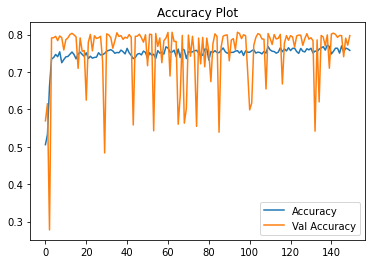

In [34]:
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

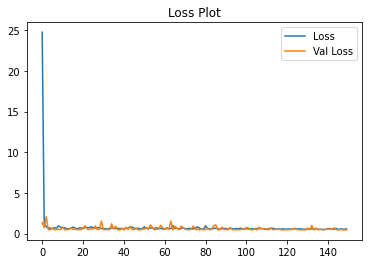

In [35]:
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()

In [36]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)

66/66 [==============================] - 0s 1ms/step


In [37]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred)*100)
print(classification_report(Y_test, Y_pred))

[[1433  147]
 [ 281  249]]
Accuracy Score: 79.71563981042654
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1580
           1       0.63      0.47      0.54       530

    accuracy                           0.80      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.80      0.79      2110

